# Data Pre

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

train = pd.read_csv('train.csv')

In [38]:
train

PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000             C123        S
4              5         0       3                                                            Allen, Mr. William Henry    male  35.00      0      0              373450    8.0500              NaN        S
5              6         0       3                                                                    Moran, Mr. James    male    NaN      0      0              330877    8.4583              NaN        Q
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.00      0      0               17463   51.8625              E46        S
7              8         0       3                                                      Palsson, Master. Gosta Leonard    male   2.00      3      1              349909   21.0750              NaN        S
8              9         1       3                                   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.00      0      2              347742   11.1333              NaN        S
9             10         1       2                                                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.00      1      0              237736   30.0708              NaN        C
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.00      1      1             PP 9549   16.7000               G6        S
11            12         1       1                                                            Bonnell, Miss. Elizabeth  female  58.00      0      0              113783   26.5500             C103        S
12            13         0       3                                                      Saundercock, Mr. William Henry    male  20.00      0      0           A/5. 2151    8.0500              NaN        S
13            14         0       3                                                         Andersson, Mr. Anders Johan    male  39.00      1      5              347082   31.2750              NaN        S
14            15         0       3                                                Vestrom, Miss. Hulda Amanda Adolfina  female  14.00      0      0              350406    7.8542              NaN        S
15            16         1       2                                                    Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0      0              248706   16.0000              NaN        S
16            17         0       3                                                                Rice, Master. Eugene    male   2.00      4      1              382652   29.1250              NaN        Q
17            18         1       2                                                        Williams, Mr. Charles Eugene    male    NaN      0      0              244373   13.0000              NaN        S
18            19         0       3                             Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  female  3

In [39]:

def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进RandomForestRegressor
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    # 定义 特征值

    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    y = known_age[:, 0]
    # age
    x = known_age[:, 1:]
    # 后续特征值

    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x, y)
    # fit 特征值，prediction
    # 跑Random Forest
    # 建立模型， then the rfr 就是一个通过 known_age 数据得出的随机森林模型

    # 用得到的模型来进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    # 这里的 unknown_age[:, 1::] 就是 x 我们要预测的东西是 y
    # 所以 y = rfr.predict(X)
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges

    return df


def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    # notnull / isnull 可以直接做判断

    return df


train = set_missing_ages(train)

train

PassengerId  Survived  Pclass                                                                                Name     Sex        Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.000000      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.000000      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.000000      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1      0              113803   53.1000             C123        S
4              5         0       3                                                            Allen, Mr. William Henry    male  35.000000      0      0              373450    8.0500              NaN        S
5              6         0       3                                                                    Moran, Mr. James    male  23.838953      0      0              330877    8.4583              NaN        Q
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.000000      0      0               17463   51.8625              E46        S
7              8         0       3                                                      Palsson, Master. Gosta Leonard    male   2.000000      3      1              349909   21.0750              NaN        S
8              9         1       3                                   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000      0      2              347742   11.1333              NaN        S
9             10         1       2                                                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000      1      0              237736   30.0708              NaN        C
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.000000      1      1             PP 9549   16.7000               G6        S
11            12         1       1                                                            Bonnell, Miss. Elizabeth  female  58.000000      0      0              113783   26.5500             C103        S
12            13         0       3                                                      Saundercock, Mr. William Henry    male  20.000000      0      0           A/5. 2151    8.0500              NaN        S
13            14         0       3                                                         Andersson, Mr. Anders Johan    male  39.000000      1      5              347082   31.2750              NaN        S
14            15         0       3                                                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000      0      0              350406    7.8542              NaN        S
15            16         1       2                                                    Hewlett, Mrs. (Mary D Kingcome)   female  55.000000      0      0              248706   16.0000              NaN        S
16            17         0       3                                                                Rice, Master. Eugene    male   2.000000      4      1              382652   29.1250              NaN        Q
17            18         1       2                                                        Williams, Mr. Charles Eugene    male  32.066493      0      0              244373   13.0000              NaN        S
18            19         0       3                   

In [40]:
train_over = set_Cabin_type(train)

train_over

PassengerId  Survived  Pclass                                                                                Name     Sex        Age  SibSp  Parch              Ticket      Fare Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.000000      1      0           A/5 21171    7.2500    No        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.000000      1      0            PC 17599   71.2833   Yes        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.000000      0      0    STON/O2. 3101282    7.9250    No        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1      0              113803   53.1000   Yes        S
4              5         0       3                                                            Allen, Mr. William Henry    male  35.000000      0      0              373450    8.0500    No        S
5              6         0       3                                                                    Moran, Mr. James    male  23.838953      0      0              330877    8.4583    No        Q
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.000000      0      0               17463   51.8625   Yes        S
7              8         0       3                                                      Palsson, Master. Gosta Leonard    male   2.000000      3      1              349909   21.0750    No        S
8              9         1       3                                   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000      0      2              347742   11.1333    No        S
9             10         1       2                                                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000      1      0              237736   30.0708    No        C
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.000000      1      1             PP 9549   16.7000   Yes        S
11            12         1       1                                                            Bonnell, Miss. Elizabeth  female  58.000000      0      0              113783   26.5500   Yes        S
12            13         0       3                                                      Saundercock, Mr. William Henry    male  20.000000      0      0           A/5. 2151    8.0500    No        S
13            14         0       3                                                         Andersson, Mr. Anders Johan    male  39.000000      1      5              347082   31.2750    No        S
14            15         0       3                                                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000      0      0              350406    7.8542    No        S
15            16         1       2                                                    Hewlett, Mrs. (Mary D Kingcome)   female  55.000000      0      0              248706   16.0000    No        S
16            17         0       3                                                                Rice, Master. Eugene    male   2.000000      4      1              382652   29.1250    No        Q
17            18         1       2                                                        Williams, Mr. Charles Eugene    male  32.066493      0      0              244373   13.0000    No        S
18            19         0       3                             Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  female  31.000000      1      0              345763   18.0000    No        S
19            20         1       3                               

In [41]:
train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
train_over['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [43]:
dummies_Cabin = pd.get_dummies(train_over['Cabin'], prefix='Cabin')

dummies_Embarked = pd.get_dummies(train_over['Embarked'], prefix='Embarked')

dummies_Sex = pd.get_dummies(train_over['Sex'], prefix='Sex')

dummies_Pclass = pd.get_dummies(train_over['Pclass'], prefix='Pclass')

In [44]:
dummies_Cabin

Cabin_No  Cabin_Yes
0           1          0
1           0          1
2           1          0
3           0          1
4           1          0
5           1          0
6           0          1
7           1          0
8           1          0
9           1          0
10          0          1
11          0          1
12          1          0
13          1          0
14          1          0
15          1          0
16          1          0
17          1          0
18          1          0
19          1          0
20          1          0
21          0          1
22          1          0
23          0          1
24          1          0
25          1          0
26          1          0
27          0          1
28          1          0
29          1          0
30          1          0
31          0          1
32          1          0
33          1          0
34          1          0
35          1          0
36          1          0
37          1          0
38          1          0
39          1          0
40          1          0
41          1          0
42          1          0
43          1          0
44          1          0
45          1          0
46          1          0
47          1          0
48          1          0
49          1          0
50          1          0
51          1          0
52          0          1
53          1          0
54          0          1
55          0          1
56          1          0
57          1          0
58          1          0
59          1          0
60          1          0
61          0          1
62          0          1
63          1          0
64          1          0
65          1          0
66          0          1
67          1          0
68          1          0
69          1          0
70          1          0
71          1          0
72          1          0
73          1          0
74          1          0
75          0          1
76          1          0
77          1          0
78          1          0
79          1          0
80          1          0
81          1          0
82          1          0
83          1          0
84          1          0
85          1          0
86          1          0
87          1          0
88          0          1
89          1          0
90          1          0
91          1          0
92          0          1
93          1          0
94          1          0
95          1          0
96          0          1
97          0          1
98          1          0
99          1          0
100         1          0
101         1          0
102         0          1
103         1          0
104         1          0
105         1          0
106         1          0
107         1          0
108         1          0
109         1          0
110         0          1
111         1          0
112         1          0
113         1          0
114         1          0
115         1          0
116         1          0
117         1          0
118         0          1
119         1          0
120         1          0
121         1          0
122         1          0
123         0          1
124         0          1
125         1          0
126         1          0
127         1          0
128         0          1
129         1          0
130         1          0
131         1          0
132         1          0
133         1          0
134         1          0
135         1          0
136         0          1
137         0          1
138         1          0
139         0          1
140         1          0
141         1          0
142         1          0
143         1          0
144         1          0
145         1          0
146         1          0
147         1          0
148         0          1
149         1          0
150         1          0
151         0          1
152         1          0
153         1          0
154         1          0
155         1          0
156         1          0
157         1          0
158         1          0
159  

In [45]:
dummies_Embarked

Embarked_C  Embarked_Q  Embarked_S
0             0           0           1
1             1           0           0
2             0           0           1
3             0           0           1
4             0           0           1
5             0           1           0
6             0           0           1
7             0           0           1
8             0           0           1
9             1           0           0
10            0           0           1
11            0           0           1
12            0           0           1
13            0           0           1
14            0           0           1
15            0           0           1
16            0           1           0
17            0           0           1
18            0           0           1
19            1           0           0
20            0           0           1
21            0           0           1
22            0           1           0
23            0           0           1
24            0           0           1
25            0           0           1
26            1           0           0
27            0           0           1
28            0           1           0
29            0           0           1
30            1           0           0
31            1           0           0
32            0           1           0
33            0           0           1
34            1           0           0
35            0           0           1
36            1           0           0
37            0           0           1
38            0           0           1
39            1           0           0
40            0           0           1
41            0           0           1
42            1           0           0
43            1           0           0
44            0           1           0
45            0           0           1
46            0           1           0
47            0           1           0
48            1           0           0
49            0           0           1
50            0           0           1
51            0           0           1
52            1           0           0
53            0           0           1
54            1           0           0
55            0           0           1
56            0           0           1
57            1           0           0
58            0           0           1
59            0           0           1
60            1           0           0
61            0           0           0
62            0           0           1
63            0           0           1
64            1           0           0
65            1           0           0
66            0           0           1
67            0           0           1
68            0           0           1
69            0           0           1
70            0           0           1
71            0           0           1
72            0           0           1
73            1           0           0
74            0           0           1
75            0           0           1
76            0           0           1
77            0           0           1
78            0           0           1
79            0           0           1
80            0           0           1
81            0           0           1
82            0           1           0
83            0           0           1
84            0           0           1
85            0           0           1
86            0           0           1
87            0           0           1
88            0           0           1
89            0           0           1
90            0           0           1
91            0           0           1
92            0           0           1
93            0           0           1
94            0           0           1
95            0           0           1
96            1           0           0
97            1           0           0
98            0           0           1
99   

In [46]:
df = pd.concat([train_over, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)

df

PassengerId  Survived  Pclass                                                                                Name     Sex        Age  SibSp  Parch              Ticket      Fare Cabin Embarked  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.000000      1      0           A/5 21171    7.2500    No        S         1          0           0           0           1           0         1         0         0         1
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.000000      1      0            PC 17599   71.2833   Yes        C         0          1           1           0           0           1         0         1         0         0
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.000000      0      0    STON/O2. 3101282    7.9250    No        S         1          0           0           0           1           1         0         0         0         1
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1      0              113803   53.1000   Yes        S         0          1           0           0           1           1         0         1         0         0
4              5         0       3                                                            Allen, Mr. William Henry    male  35.000000      0      0              373450    8.0500    No        S         1          0           0           0           1           0         1         0         0         1
5              6         0       3                                                                    Moran, Mr. James    male  23.838953      0      0              330877    8.4583    No        Q         1          0           0           1           0           0         1         0         0         1
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.000000      0      0               17463   51.8625   Yes        S         0          1           0           0           1           0         1         1         0         0
7              8         0       3                                                      Palsson, Master. Gosta Leonard    male   2.000000      3      1              349909   21.0750    No        S         1          0           0           0           1           0         1         0         0         1
8              9         1       3                                   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000      0      2              347742   11.1333    No        S         1          0           0           0           1           1         0         0         0         1
9             10         1       2                                                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000      1      0              237736   30.0708    No        C         1          0           1           0           0           1         0         0         1         0
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.000000      1      1             PP 9549   16.7000   Yes        S         0          1           0           0           1           1         0         0         0         1
11            12         1       1                                                            Bonnell, Miss. Elizabeth  female  58.000000      0      0              113783   26.5500   Yes        S         0          1           0           0           1           1         0         1         0         0
12            13         0 

In [47]:
df.drop(['Pclass', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

df
# 全是数字 可以做machine learning

# 有一种临近结果的宠宠欲动感吧，莫急莫急，我们还得做一些处理，仔细看看Age和Fare两个属性，乘客的数值幅度变化太大了
# 如果大家了解逻辑回归与梯度下降的话，会知道，各属性值之间scale差距太大，将对收敛速度造成几万点伤害值！甚至不收敛
# 所以我们先用scikit-learn里面的preprocessing模块对这俩货做一个scaling，所谓scaling，其实就是将一些变化幅度较大的特征化到[-1,1]之内。

PassengerId  Survived     Sex        Age  SibSp  Parch      Fare  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0              1         0    male  22.000000      1      0    7.2500         1          0           0           0           1           0         1         0         0         1
1              2         1  female  38.000000      1      0   71.2833         0          1           1           0           0           1         0         1         0         0
2              3         1  female  26.000000      0      0    7.9250         1          0           0           0           1           1         0         0         0         1
3              4         1  female  35.000000      1      0   53.1000         0          1           0           0           1           1         0         1         0         0
4              5         0    male  35.000000      0      0    8.0500         1          0           0           0           1           0         1         0         0         1
5              6         0    male  23.838953      0      0    8.4583         1          0           0           1           0           0         1         0         0         1
6              7         0    male  54.000000      0      0   51.8625         0          1           0           0           1           0         1         1         0         0
7              8         0    male   2.000000      3      1   21.0750         1          0           0           0           1           0         1         0         0         1
8              9         1  female  27.000000      0      2   11.1333         1          0           0           0           1           1         0         0         0         1
9             10         1  female  14.000000      1      0   30.0708         1          0           1           0           0           1         0         0         1         0
10            11         1  female   4.000000      1      1   16.7000         0          1           0           0           1           1         0         0         0         1
11            12         1  female  58.000000      0      0   26.5500         0          1           0           0           1           1         0         1         0         0
12            13         0    male  20.000000      0      0    8.0500         1          0           0           0           1           0         1         0         0         1
13            14         0    male  39.000000      1      5   31.2750         1          0           0           0           1           0         1         0         0         1
14            15         0  female  14.000000      0      0    7.8542         1          0           0           0           1           1         0         0         0         1
15            16         1  female  55.000000      0      0   16.0000         1          0           0           0           1           1         0         0         1         0
16            17         0    male   2.000000      4      1   29.1250         1          0           0           1           0           0         1         0         0         1
17            18         1    male  32.066493      0      0   13.0000         1          0           0           0           1           0         1         0         1         0
18            19         0  female  31.000000      1      0   18.0000         1          0           0           0           1           1         0         0         0         1
19            20         1  female  29.518205      0      0    7.2250         1          0           1           0           0           1         0         0         0         1
20            21         0    male  35.000000      0      0   26.0000         1          0           0           0           1           0         1         0         1         0
21            22         1    male  34.000000      0      0   13.00

In [48]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

df

PassengerId  Survived     Sex        Age  SibSp  Parch      Fare  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Age_scaled  Fare_scaled
0              1         0    male  22.000000      1      0    7.2500         1          0           0           0           1           0         1         0         0         1   -0.561377    -0.502445
1              2         1  female  38.000000      1      0   71.2833         0          1           1           0           0           1         0         1         0         0    0.613173     0.786845
2              3         1  female  26.000000      0      0    7.9250         1          0           0           0           1           1         0         0         0         1   -0.267740    -0.488854
3              4         1  female  35.000000      1      0   53.1000         0          1           0           0           1           1         0         1         0         0    0.392945     0.420730
4              5         0    male  35.000000      0      0    8.0500         1          0           0           0           1           0         1         0         0         1    0.392945    -0.486337
5              6         0    male  23.838953      0      0    8.4583         1          0           0           1           0           0         1         0         0         1   -0.426381    -0.478116
6              7         0    male  54.000000      0      0   51.8625         0          1           0           0           1           0         1         1         0         0    1.787723     0.395814
7              8         0    male   2.000000      3      1   21.0750         1          0           0           0           1           0         1         0         0         1   -2.029565    -0.224083
8              9         1  female  27.000000      0      2   11.1333         1          0           0           0           1           1         0         0         0         1   -0.194330    -0.424256
9             10         1  female  14.000000      1      0   30.0708         1          0           1           0           0           1         0         0         1         0   -1.148652    -0.042956
10            11         1  female   4.000000      1      1   16.7000         0          1           0           0           1           1         0         0         0         1   -1.882746    -0.312172
11            12         1  female  58.000000      0      0   26.5500         0          1           0           0           1           1         0         1         0         0    2.081361    -0.113846
12            13         0    male  20.000000      0      0    8.0500         1          0           0           0           1           0         1         0         0         1   -0.708196    -0.486337
13            14         0    male  39.000000      1      5   31.2750         1          0           0           0           1           0         1         0         0         1    0.686582    -0.018709
14            15         0  female  14.000000      0      0    7.8542         1          0           0           0           1           1         0         0         0         1   -1.148652    -0.490280
15            16         1  female  55.000000      0      0   16.0000         1          0           0           0           1           1         0         0         1         0    1.861132    -0.326267
16            17         0    male   2.000000      4      1   29.1250         1          0           0           1           0           0         1         0         0         1   -2.029565    -0.061999
17            18         1    male  32.066493      0      0   13.0000         1          0           0           0           1           0         1         0         1         0    0.177598    -0.386671
18            19         0  female  31.000000      1      0   18.0000         1          0           0           0           1   

In [49]:
df.drop(['Age', 'Fare'], inplace=True, axis=1)
df

PassengerId  Survived     Sex  SibSp  Parch  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Age_scaled  Fare_scaled
0              1         0    male      1      0         1          0           0           0           1           0         1         0         0         1   -0.561377    -0.502445
1              2         1  female      1      0         0          1           1           0           0           1         0         1         0         0    0.613173     0.786845
2              3         1  female      0      0         1          0           0           0           1           1         0         0         0         1   -0.267740    -0.488854
3              4         1  female      1      0         0          1           0           0           1           1         0         1         0         0    0.392945     0.420730
4              5         0    male      0      0         1          0           0           0           1           0         1         0         0         1    0.392945    -0.486337
5              6         0    male      0      0         1          0           0           1           0           0         1         0         0         1   -0.426381    -0.478116
6              7         0    male      0      0         0          1           0           0           1           0         1         1         0         0    1.787723     0.395814
7              8         0    male      3      1         1          0           0           0           1           0         1         0         0         1   -2.029565    -0.224083
8              9         1  female      0      2         1          0           0           0           1           1         0         0         0         1   -0.194330    -0.424256
9             10         1  female      1      0         1          0           1           0           0           1         0         0         1         0   -1.148652    -0.042956
10            11         1  female      1      1         0          1           0           0           1           1         0         0         0         1   -1.882746    -0.312172
11            12         1  female      0      0         0          1           0           0           1           1         0         1         0         0    2.081361    -0.113846
12            13         0    male      0      0         1          0           0           0           1           0         1         0         0         1   -0.708196    -0.486337
13            14         0    male      1      5         1          0           0           0           1           0         1         0         0         1    0.686582    -0.018709
14            15         0  female      0      0         1          0           0           0           1           1         0         0         0         1   -1.148652    -0.490280
15            16         1  female      0      0         1          0           0           0           1           1         0         0         1         0    1.861132    -0.326267
16            17         0    male      4      1         1          0           0           1           0           0         1         0         0         1   -2.029565    -0.061999
17            18         1    male      0      0         1          0           0           0           1           0         1         0         1         0    0.177598    -0.386671
18            19         0  female      1      0         1          0           0           0           1           1         0         0         0         1    0.099307    -0.285997
19            20         1  female      0      0         1          0           1           0           0           1         0         0         0         1   -0.009470    -0.502949
20            21         0    male      0      0         1          0           0           0           1           0         1         0         1         0    0

In [50]:
# 逻辑回归建模
# 我们吧需要的字段取出来，转换成numpy格式，use the sklearn and LogisticRegression

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_*|Cabin_*|Embarked_.*|Sex_.*|Pclass_.*')
train_df



Survived  SibSp  Parch  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Age_scaled  Fare_scaled
0           0      1      0         1          0           0           0           1           0         1         0         0         1   -0.561377    -0.502445
1           1      1      0         0          1           1           0           0           1         0         1         0         0    0.613173     0.786845
2           1      0      0         1          0           0           0           1           1         0         0         0         1   -0.267740    -0.488854
3           1      1      0         0          1           0           0           1           1         0         1         0         0    0.392945     0.420730
4           0      0      0         1          0           0           0           1           0         1         0         0         1    0.392945    -0.486337
5           0      0      0         1          0           0           1           0           0         1         0         0         1   -0.426381    -0.478116
6           0      0      0         0          1           0           0           1           0         1         1         0         0    1.787723     0.395814
7           0      3      1         1          0           0           0           1           0         1         0         0         1   -2.029565    -0.224083
8           1      0      2         1          0           0           0           1           1         0         0         0         1   -0.194330    -0.424256
9           1      1      0         1          0           1           0           0           1         0         0         1         0   -1.148652    -0.042956
10          1      1      1         0          1           0           0           1           1         0         0         0         1   -1.882746    -0.312172
11          1      0      0         0          1           0           0           1           1         0         1         0         0    2.081361    -0.113846
12          0      0      0         1          0           0           0           1           0         1         0         0         1   -0.708196    -0.486337
13          0      1      5         1          0           0           0           1           0         1         0         0         1    0.686582    -0.018709
14          0      0      0         1          0           0           0           1           1         0         0         0         1   -1.148652    -0.490280
15          1      0      0         1          0           0           0           1           1         0         0         1         0    1.861132    -0.326267
16          0      4      1         1          0           0           1           0           0         1         0         0         1   -2.029565    -0.061999
17          1      0      0         1          0           0           0           1           0         1         0         1         0    0.177598    -0.386671
18          0      1      0         1          0           0           0           1           1         0         0         0         1    0.099307    -0.285997
19          1      0      0         1          0           1           0           0           1         0         0         0         1   -0.009470    -0.502949
20          0      0      0         1          0           0           0           1           0         1         0         1         0    0.392945    -0.124920
21          1      0      0         0          1           0           0           1           0         1         0         1         0    0.319535    -0.386671
22          1      0      0         1          0           0           1           0           1         0         0         0         1   -1.075243    -0.486756
23          1      0      0         0          1           0           0           1           0         1         1 

In [51]:
train_np = train_df.to_numpy()
train_np

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.56137734, -0.50244517],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         0.61317288,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.26773978, -0.48885426],
       ...,
       [ 0.        ,  1.        ,  2.        , ...,  1.        ,
        -0.98824435, -0.17626324],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.26773978, -0.04438104],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.17271655, -0.49237783]])

In [52]:
from sklearn import linear_model

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(X, y)
print(clf)


LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)


In [53]:
test = pd.read_csv('test.csv')
test.loc[(test.Fare.isnull()), 'Fare'] = 0
test = set_missing_ages(test)
test_over = set_Cabin_type(test)

dummies_Cabin = pd.get_dummies(test_over['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(test_over['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(test_over['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(test_over['Pclass'], prefix='Pclass')
df_test = pd.concat([test_over, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

scaler = preprocessing.StandardScaler()
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']])
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']])


In [54]:
test_over

PassengerId  Pclass                                                             Name     Sex        Age  SibSp  Parch              Ticket      Fare Cabin Embarked
0            892       3                                                 Kelly, Mr. James    male  34.500000      0      0              330911    7.8292    No        Q
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.000000      1      0              363272    7.0000    No        S
2            894       2                                        Myles, Mr. Thomas Francis    male  62.000000      0      0              240276    9.6875    No        Q
3            895       3                                                 Wirz, Mr. Albert    male  27.000000      0      0              315154    8.6625    No        S
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.000000      1      1             3101298   12.2875    No        S
5            897       3                                       Svensson, Mr. Johan Cervin    male  14.000000      0      0                7538    9.2250    No        S
6            898       3                                             Connolly, Miss. Kate  female  30.000000      0      0              330972    7.6292    No        Q
7            899       2                                     Caldwell, Mr. Albert Francis    male  26.000000      1      1              248738   29.0000    No        S
8            900       3                        Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.000000      0      0                2657    7.2292    No        C
9            901       3                                          Davies, Mr. John Samuel    male  21.000000      2      0           A/4 48871   24.1500    No        S
10           902       3                                                 Ilieff, Mr. Ylio    male  27.752688      0      0              349220    7.8958    No        S
11           903       1                                       Jones, Mr. Charles Cresson    male  46.000000      0      0                 694   26.0000    No        S
12           904       1                    Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.000000      1      0               21228   82.2667   Yes        S
13           905       2                                             Howard, Mr. Benjamin    male  63.000000      1      0               24065   26.0000    No        S
14           906       1          Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)  female  47.000000      1      0         W.E.P. 5734   61.1750   Yes        S
15           907       2                    del Carlo, Mrs. Sebastiano (Argenia Genovesi)  female  24.000000      1      0       SC/PARIS 2167   27.7208    No        C
16           908       2                                                Keane, Mr. Daniel    male  35.000000      0      0              233734   12.3500    No        Q
17           909       3                                                Assaf, Mr. Gerios    male  21.000000      0      0                2692    7.2250    No        C
18           910       3                                     Ilmakangas, Miss. Ida Livija  female  27.000000      1      0    STON/O2. 3101270    7.9250    No        S
19           911       3                            Assaf Khalil, Mrs. Mariana (Miriam")"  female  45.000000      0      0                2696    7.2250    No        C
20           912       1                                           Rothschild, Mr. Martin    male  55.000000      1      0            PC 17603   59.4000    No        C
21           913       3                                        Olsen, Master. Artur Karl    male   9.000000      0      1             C 17368    3.1708    No        S
22           914       1                             Flegenheim, Mrs. Alfred (Antoinette)  female  37.918798      0      0            PC 1759

In [55]:
df_test

PassengerId        Age  SibSp  Parch      Fare  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Age_scaled  Fare_scaled
0            892  34.500000      0      0    7.8292         1          0           0           1           0           0         1         0         0         1    0.367102    -0.496637
1            893  47.000000      1      0    7.0000         1          0           0           0           1           1         0         0         0         1    1.331237    -0.511497
2            894  62.000000      0      0    9.6875         1          0           0           1           0           0         1         0         1         0    2.488198    -0.463335
3            895  27.000000      0      0    8.6625         1          0           0           0           1           0         1         0         0         1   -0.211379    -0.481704
4            896  22.000000      1      1   12.2875         1          0           0           0           1           1         0         0         0         1   -0.597033    -0.416740
5            897  14.000000      0      0    9.2250         1          0           0           0           1           0         1         0         0         1   -1.214079    -0.471623
6            898  30.000000      0      0    7.6292         1          0           0           1           0           1         0         0         0         1    0.020013    -0.500221
7            899  26.000000      1      1   29.0000         1          0           0           0           1           0         1         0         1         0   -0.288510    -0.117238
8            900  18.000000      0      0    7.2292         1          0           1           0           0           1         0         0         0         1   -0.905556    -0.507390
9            901  21.000000      2      0   24.1500         1          0           0           0           1           0         1         0         0         1   -0.674164    -0.204154
10           902  27.752688      0      0    7.8958         1          0           0           0           1           0         1         0         0         1   -0.153324    -0.495444
11           903  46.000000      0      0   26.0000         1          0           0           0           1           0         1         1         0         0    1.254106    -0.171000
12           904  23.000000      1      0   82.2667         0          1           0           0           1           1         0         1         0         0   -0.519902     0.837349
13           905  63.000000      1      0   26.0000         1          0           0           0           1           0         1         0         1         0    2.565329    -0.171000
14           906  47.000000      1      0   61.1750         0          1           0           0           1           1         0         1         0         0    1.331237     0.459367
15           907  24.000000      1      0   27.7208         1          0           1           0           0           1         0         0         1         0   -0.442771    -0.140162
16           908  35.000000      0      0   12.3500         1          0           0           1           0           0         1         0         1         0    0.405667    -0.415620
17           909  21.000000      0      0    7.2250         1          0           1           0           0           0         1         0         0         1   -0.674164    -0.507465
18           910  27.000000      1      0    7.9250         1          0           0           0           1           1         0         0         0         1   -0.211379    -0.494920
19           911  45.000000      0      0    7.2250         1          0           1           0           0           1         0         0         0         1    1.176975    -0.507465
20           912  55.000000      1      0   59.4000         1          0           1           0   

In [56]:
# 预测结果

import warnings

warnings.filterwarnings('ignore')
test_end = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test_end)
result = pd.DataFrame({'PassengerId': test['PassengerId'].values, 'Survived': predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)
print('预测完成')

预测完成


In [57]:
test_end

SibSp  Parch  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Age_scaled  Fare_scaled
0        0      0         1          0           0           1           0           0         1         0         0         1    0.367102    -0.496637
1        1      0         1          0           0           0           1           1         0         0         0         1    1.331237    -0.511497
2        0      0         1          0           0           1           0           0         1         0         1         0    2.488198    -0.463335
3        0      0         1          0           0           0           1           0         1         0         0         1   -0.211379    -0.481704
4        1      1         1          0           0           0           1           1         0         0         0         1   -0.597033    -0.416740
5        0      0         1          0           0           0           1           0         1         0         0         1   -1.214079    -0.471623
6        0      0         1          0           0           1           0           1         0         0         0         1    0.020013    -0.500221
7        1      1         1          0           0           0           1           0         1         0         1         0   -0.288510    -0.117238
8        0      0         1          0           1           0           0           1         0         0         0         1   -0.905556    -0.507390
9        2      0         1          0           0           0           1           0         1         0         0         1   -0.674164    -0.204154
10       0      0         1          0           0           0           1           0         1         0         0         1   -0.153324    -0.495444
11       0      0         1          0           0           0           1           0         1         1         0         0    1.254106    -0.171000
12       1      0         0          1           0           0           1           1         0         1         0         0   -0.519902     0.837349
13       1      0         1          0           0           0           1           0         1         0         1         0    2.565329    -0.171000
14       1      0         0          1           0           0           1           1         0         1         0         0    1.331237     0.459367
15       1      0         1          0           1           0           0           1         0         0         1         0   -0.442771    -0.140162
16       0      0         1          0           0           1           0           0         1         0         1         0    0.405667    -0.415620
17       0      0         1          0           1           0           0           0         1         0         0         1   -0.674164    -0.507465
18       1      0         1          0           0           0           1           1         0         0         0         1   -0.211379    -0.494920
19       0      0         1          0           1           0           0           1         0         0         0         1    1.176975    -0.507465
20       1      0         1          0           1           0           0           0         1         1         0         0    1.948283     0.427557
21       0      1         1          0           0           0           1           0         1         0         0         1   -1.599733    -0.580120
22       0      0         1          0           0           0           1           1         0         1         0         0    0.630796    -0.069151
23       0      1         1          0           1           0           0           0         1         1         0         0   -0.674164     0.463026
24       1      3         0          1           1           0           0           1         0         1         0         0    1.408367     4.065049
25       1      0         1          0           0   

In [58]:
test

PassengerId  Pclass                                                             Name     Sex        Age  SibSp  Parch              Ticket      Fare Cabin Embarked
0            892       3                                                 Kelly, Mr. James    male  34.500000      0      0              330911    7.8292    No        Q
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.000000      1      0              363272    7.0000    No        S
2            894       2                                        Myles, Mr. Thomas Francis    male  62.000000      0      0              240276    9.6875    No        Q
3            895       3                                                 Wirz, Mr. Albert    male  27.000000      0      0              315154    8.6625    No        S
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.000000      1      1             3101298   12.2875    No        S
5            897       3                                       Svensson, Mr. Johan Cervin    male  14.000000      0      0                7538    9.2250    No        S
6            898       3                                             Connolly, Miss. Kate  female  30.000000      0      0              330972    7.6292    No        Q
7            899       2                                     Caldwell, Mr. Albert Francis    male  26.000000      1      1              248738   29.0000    No        S
8            900       3                        Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.000000      0      0                2657    7.2292    No        C
9            901       3                                          Davies, Mr. John Samuel    male  21.000000      2      0           A/4 48871   24.1500    No        S
10           902       3                                                 Ilieff, Mr. Ylio    male  27.752688      0      0              349220    7.8958    No        S
11           903       1                                       Jones, Mr. Charles Cresson    male  46.000000      0      0                 694   26.0000    No        S
12           904       1                    Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.000000      1      0               21228   82.2667   Yes        S
13           905       2                                             Howard, Mr. Benjamin    male  63.000000      1      0               24065   26.0000    No        S
14           906       1          Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)  female  47.000000      1      0         W.E.P. 5734   61.1750   Yes        S
15           907       2                    del Carlo, Mrs. Sebastiano (Argenia Genovesi)  female  24.000000      1      0       SC/PARIS 2167   27.7208    No        C
16           908       2                                                Keane, Mr. Daniel    male  35.000000      0      0              233734   12.3500    No        Q
17           909       3                                                Assaf, Mr. Gerios    male  21.000000      0      0                2692    7.2250    No        C
18           910       3                                     Ilmakangas, Miss. Ida Livija  female  27.000000      1      0    STON/O2. 3101270    7.9250    No        S
19           911       3                            Assaf Khalil, Mrs. Mariana (Miriam")"  female  45.000000      0      0                2696    7.2250    No        C
20           912       1                                           Rothschild, Mr. Martin    male  55.000000      1      0            PC 17603   59.4000    No        C
21           913       3                                        Olsen, Master. Artur Karl    male   9.000000      0      1             C 17368    3.1708    No        S
22           914       1                             Flegenheim, Mrs. Alfred (Antoinette)  female  37.918798      0      0            PC 1759

In [59]:
predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [60]:
pd.DataFrame({"columns": list(train_df.columns)[1:], "coef": list(clf.coef_.T)})

columns                    coef
0         SibSp  [-0.34423387457681764]
1         Parch   [-0.1049173610995307]
2      Cabin_No                   [0.0]
3     Cabin_Yes     [0.902089535888598]
4    Embarked_C                   [0.0]
5    Embarked_Q                   [0.0]
6    Embarked_S  [-0.41725971276726137]
7    Sex_female    [1.9565672349163294]
8      Sex_male   [-0.6774203537419469]
9      Pclass_1    [0.3411696245358677]
10     Pclass_2                   [0.0]
11     Pclass_3   [-1.1941307349184624]
12   Age_scaled   [-0.5237628141161996]
13  Fare_scaled   [0.08443579774604762]

In [61]:
# 交叉验证

# 重点又来了：
#
# 『要做交叉验证(cross validation)!』

# 恩，重要的事情说三遍。我们通常情况下，这么做cross validation：把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据上看我们预测算法的效果。
# 我们用scikit-learn的cross_validation来帮我们完成小数据集上的这个工作。
# 先简单看看cross validation情况下的打分

from sklearn.model_selection import cross_val_score

# cross validation

clf = linear_model.LogisticRegression(C=1, penalty='l1', tol=1e-6, solver='liblinear')

all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:, 1:]
y = all_data.values[:, 0]
# cv是交叉验证次数
cross_val_score(clf, X, y, cv=5)

mean_cross_val = np.mean(cross_val_score(clf, X, y, cv=5))

mean_cross_val

# cross validation is about 0.67710


0.8024543343167411

In [62]:
df

PassengerId  Survived     Sex  SibSp  Parch  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Age_scaled  Fare_scaled
0              1         0    male      1      0         1          0           0           0           1           0         1         0         0         1   -0.561377    -0.502445
1              2         1  female      1      0         0          1           1           0           0           1         0         1         0         0    0.613173     0.786845
2              3         1  female      0      0         1          0           0           0           1           1         0         0         0         1   -0.267740    -0.488854
3              4         1  female      1      0         0          1           0           0           1           1         0         1         0         0    0.392945     0.420730
4              5         0    male      0      0         1          0           0           0           1           0         1         0         0         1    0.392945    -0.486337
5              6         0    male      0      0         1          0           0           1           0           0         1         0         0         1   -0.426381    -0.478116
6              7         0    male      0      0         0          1           0           0           1           0         1         1         0         0    1.787723     0.395814
7              8         0    male      3      1         1          0           0           0           1           0         1         0         0         1   -2.029565    -0.224083
8              9         1  female      0      2         1          0           0           0           1           1         0         0         0         1   -0.194330    -0.424256
9             10         1  female      1      0         1          0           1           0           0           1         0         0         1         0   -1.148652    -0.042956
10            11         1  female      1      1         0          1           0           0           1           1         0         0         0         1   -1.882746    -0.312172
11            12         1  female      0      0         0          1           0           0           1           1         0         1         0         0    2.081361    -0.113846
12            13         0    male      0      0         1          0           0           0           1           0         1         0         0         1   -0.708196    -0.486337
13            14         0    male      1      5         1          0           0           0           1           0         1         0         0         1    0.686582    -0.018709
14            15         0  female      0      0         1          0           0           0           1           1         0         0         0         1   -1.148652    -0.490280
15            16         1  female      0      0         1          0           0           0           1           1         0         0         1         0    1.861132    -0.326267
16            17         0    male      4      1         1          0           0           1           0           0         1         0         0         1   -2.029565    -0.061999
17            18         1    male      0      0         1          0           0           0           1           0         1         0         1         0    0.177598    -0.386671
18            19         0  female      1      0         1          0           0           0           1           1         0         0         0         1    0.099307    -0.285997
19            20         1  female      0      0         1          0           1           0           0           1         0         0         0         1   -0.009470    -0.502949
20            21         0    male      0      0         1          0           0           0           1           0         1         0         1         0    0

In [63]:
from sklearn.model_selection import train_test_split

# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

In [64]:
# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(train_df.values[:, 1:], train_df.values[:, 0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:, 1:])

In [65]:
origin_data_train = pd.read_csv("train.csv")
bad_cases = origin_data_train.loc[
    origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:, 0]]['PassengerId'].values)]

bad_cases

PassengerId  Survived  Pclass                                                     Name     Sex    Age  SibSp  Parch             Ticket      Fare    Cabin Embarked
14            15         0       3                     Vestrom, Miss. Hulda Amanda Adolfina  female  14.00      0      0             350406    7.8542      NaN        S
49            50         0       3            Arnold-Franchi, Mrs. Josef (Josefine Franchi)  female  18.00      1      0             349237   17.8000      NaN        S
55            56         1       1                                        Woolner, Mr. Hugh    male    NaN      0      0              19947   35.5000      C52        S
65            66         1       3                                 Moubarek, Master. Gerios    male    NaN      1      1               2661   15.2458      NaN        C
68            69         1       3                          Andersson, Miss. Erna Alexandra  female  17.00      4      2            3101281    7.9250      NaN        S
85            86         1       3  Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)  female  33.00      3      0            3101278   15.8500      NaN        S
113          114         0       3                                  Jussila, Miss. Katriina  female  20.00      1      0               4136    9.8250      NaN        S
140          141         0       3                            Boulos, Mrs. Joseph (Sultana)  female    NaN      0      2               2678   15.2458      NaN        C
204          205         1       3                                 Cohen, Mr. Gurshon "Gus"    male  18.00      0      0           A/5 3540    8.0500      NaN        S
240          241         0       3                                    Zabour, Miss. Thamine  female    NaN      1      0               2665   14.4542      NaN        C
251          252         0       3               Strom, Mrs. Wilhelm (Elna Matilda Persson)  female  29.00      1      1             347054   10.4625       G6        S
261          262         1       3                        Asplund, Master. Edvin Rojj Felix    male   3.00      4      2             347077   31.3875      NaN        S
264          265         0       3                                       Henry, Miss. Delia  female    NaN      0      0             382649    7.7500      NaN        Q
267          268         1       3                                 Persson, Mr. Ernst Ulrik    male  25.00      1      0             347083    7.7750      NaN        S
271          272         1       3                             Tornquist, Mr. William Henry    male  25.00      0      0               LINE    0.0000      NaN        S
279          280         1       3                         Abbott, Mrs. Stanton (Rosa Hunt)  female  35.00      1      1          C.A. 2673   20.2500      NaN        S
283          284         1       3                               Dorking, Mr. Edward Arthur    male  19.00      0      0         A/5. 10482    8.0500      NaN        S
293          294         0       3                                      Haas, Miss. Aloisia  female  24.00      0      0             349236    8.8500      NaN        S
298          299         1       1                                    Saalfeld, Mr. Adolphe    male    NaN      0      0              19988   30.5000     C106        S
301          302         1       3                                       McCoy, Mr. Bernard    male    NaN      2      0             367226   23.2500      NaN        Q
312          313         0       2                    Lahtinen, Mrs. William (Anna Sylfven)  female  26.00      1      1             250651   26.0000      NaN        S
338          339         1       3                                    Dahl, Mr. Karl Edwart    male  45.00      0      0               7598    8.0500      NaN        S
362          363         0       3                          Barbara, Mrs. (Catherine David)  female  45.00      0      1               2691  

In [66]:
split_cv[predictions != cv_df.values[:, 0]]['PassengerId'].values

array([299,  15, 804, 475, 643,  56, 588, 741, 840, 302, 568, 713, 490,
       313, 484, 506, 252, 280, 839, 565, 391, 644, 268, 502, 114, 655,
       294, 504, 363, 571, 265, 763,  86, 141, 403, 448, 205, 241, 284,
       648, 853, 789,  69, 272, 883,  66, 681,  50, 339, 262])

In [67]:
df3 = origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:, 0]]['PassengerId'].values)

In [68]:
df3.value_counts()

False    841
True      50
Name: PassengerId, dtype: int64

Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import learning_curve

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    estimator: 你用的分类器。
    title: 表格的标题。
    X: 输入的feature，numpy类型
    y: 输入的target
    vector
    ylim: tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv: 做cross - validation的时候，数据分成的份数，其中一份作为cv集，其余n - 1
    份作为training(默认为3份)
    n_jobs: 并行的的任务数(默认1)
    """

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure(figsize=(12, 8))
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Num of Train Sample")
        plt.ylabel("Score")
        plt.gca()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Score in Train")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Score in Cross Validation")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca()
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])

    return midpoint, diff


train = pd.read_csv('train.csv')
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 100)
# 设置1000列的时候才换行
pd.set_option('display.width', 1000)


def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进RandomForgestRegressor
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    y = known_age[:, 0]
    x = known_age[:, 1:]

    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x, y)

    # 用得到的模型来进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges

    return df


def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df

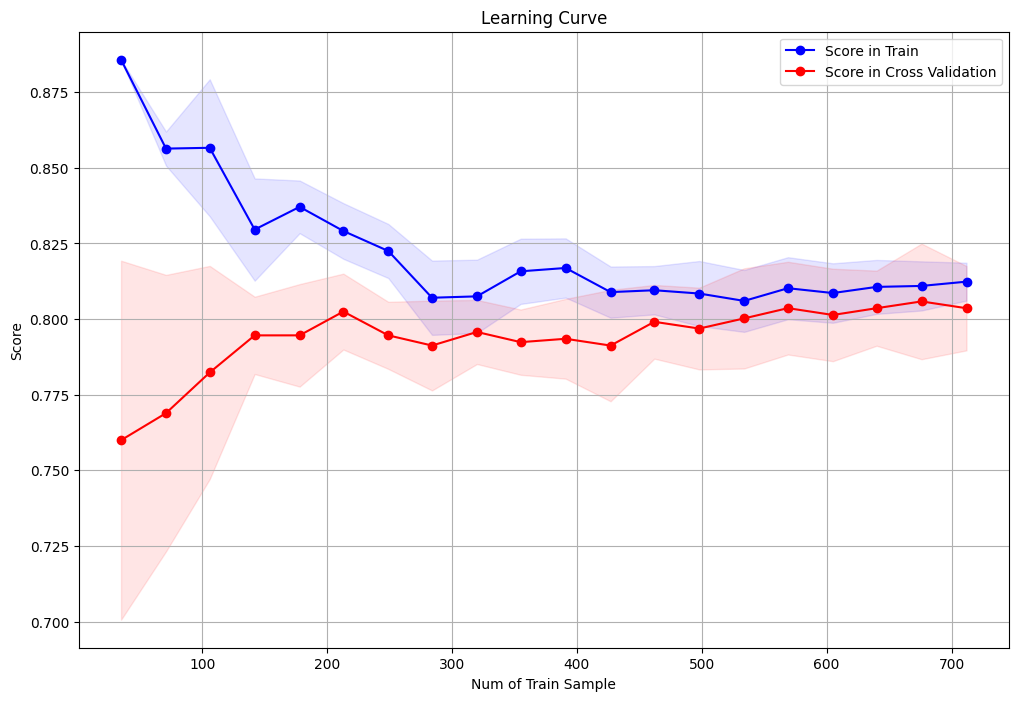

(0.8041289762608517, 0.028972978630723678)

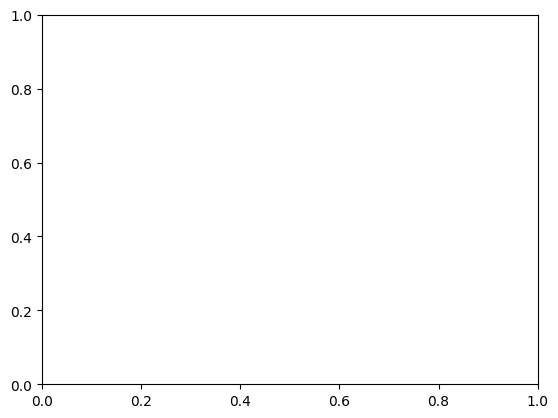

In [70]:
train = set_missing_ages(train)
train_over = set_Cabin_type(train)
dummies_Cabin = pd.get_dummies(train_over['Cabin'], prefix='Cabin')

dummies_Embarked = pd.get_dummies(train_over['Embarked'], prefix='Embarked')

dummies_Sex = pd.get_dummies(train_over['Sex'], prefix='Sex')

dummies_Pclass = pd.get_dummies(train_over['Pclass'], prefix='Pclass')

df = pd.concat([train_over, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

scaler = preprocessing.StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(X, y)

plot_learning_curve(clf, "Learning Curve", X, y)


模型融合

最简单的模型融合大概就是这么个意思，比如分类问题
当我们手头上有一堆在同一份数据集上训练得到的分类器(比如logistic regression，SVM，KNN，random forest，神经网络)
那我们让他们都分别去做判定，然后对结果做投票统计，取票数最多的结果为最后结果。
那我们干脆就不要用全部的训练集，每次取训练集的一个subset，做训练，这样，我们虽然用的是同一个机器学习算法，但是得到的模型却是不一样的；
同时，因为我们没有任何一份子数据集是全的，因此即使出现过拟合，也是在子训练集上出现过拟合，而不是全体数据上，这样做一个融合，可能对最后的结果有一定的帮助。对，这就是常用的Bagging。

In [71]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import sklearn.preprocessing as preprocessing
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import cross_val_score  #交叉验证

from sklearn.model_selection import train_test_split

train = pd.read_csv('train.csv')


In [72]:
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 100)
# 设置1000列的时候才换行
pd.set_option('display.width', 1000)
